This validates that the flat prior has the same effect as bounds.

In [1]:
from pathlib import Path

import numpy as np
from astropy import table
import betterplotlib as bpl

bpl.set_style()

In [2]:
data_dir = Path("../data/").resolve()
size_dirs = [subdir / "size" for subdir in data_dir.iterdir()]
no_prior_cats_locs = [subdir / "final_catalog_no_priors_no_masking_30_pixels_psf_my_stars_15_pixels_2x_oversampled.txt"
                      for subdir in size_dirs]
flat_prior_cat_locs = [subdir / "final_catalog_flat_priors_no_masking_30_pixels_psf_my_stars_15_pixels_2x_oversampled.txt"
                       for subdir in size_dirs]

In [3]:
cats_no_prior = {cat_path.parent.parent.name: table.Table.read(cat_path, format="ascii.ecsv")
                 for cat_path in no_prior_cats_locs if cat_path.exists()}
cats_flat_prior = {cat_path.parent.parent.name: table.Table.read(cat_path, format="ascii.ecsv")
                   for cat_path in flat_prior_cat_locs if cat_path.exists()}

In [4]:
# then match them
matches = dict()
for gal in cats_flat_prior:
    matches[gal] = table.join(
        cats_no_prior[gal], cats_flat_prior[gal], join_type="inner", keys="ID"
    )
    matches[gal]["galaxy"] = gal  # .ljust(20)
# put these all into a big column for easy use
big_catalog = table.vstack(list(matches.values()), join_type="inner")
# colnames with _1 appended are with no priors, with _2 are with flat priors


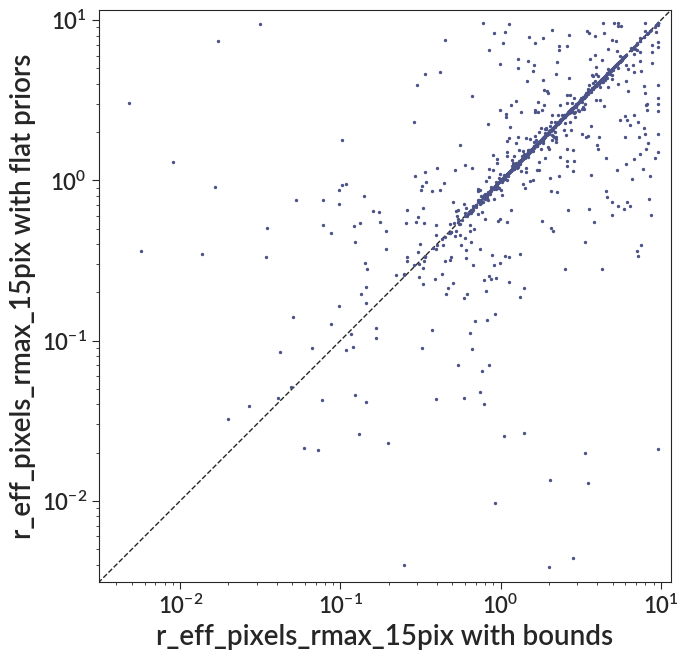

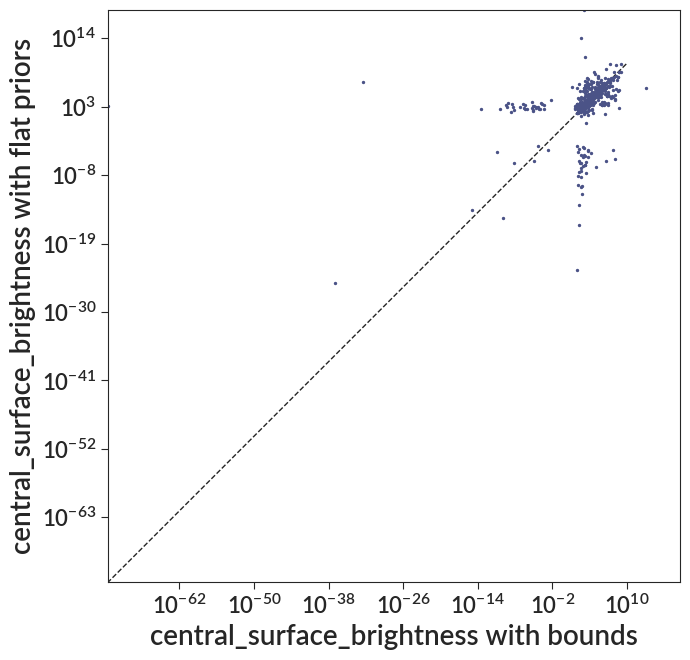

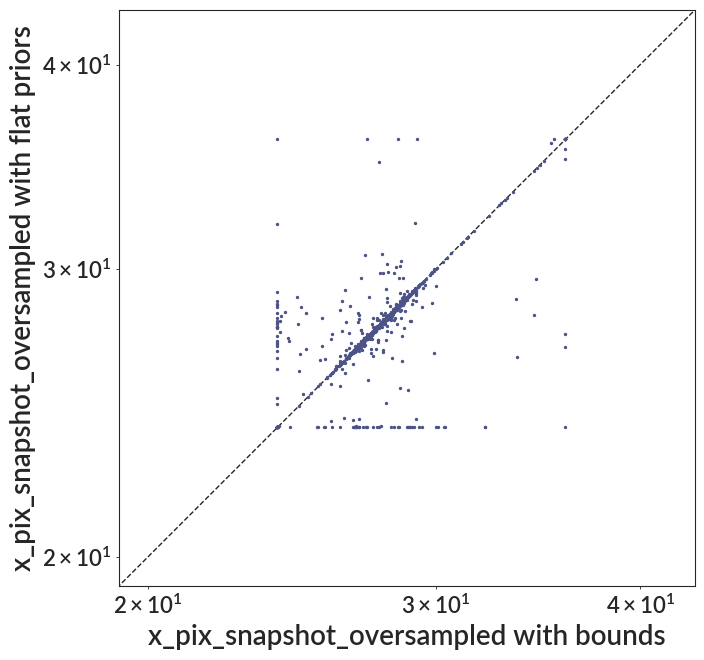

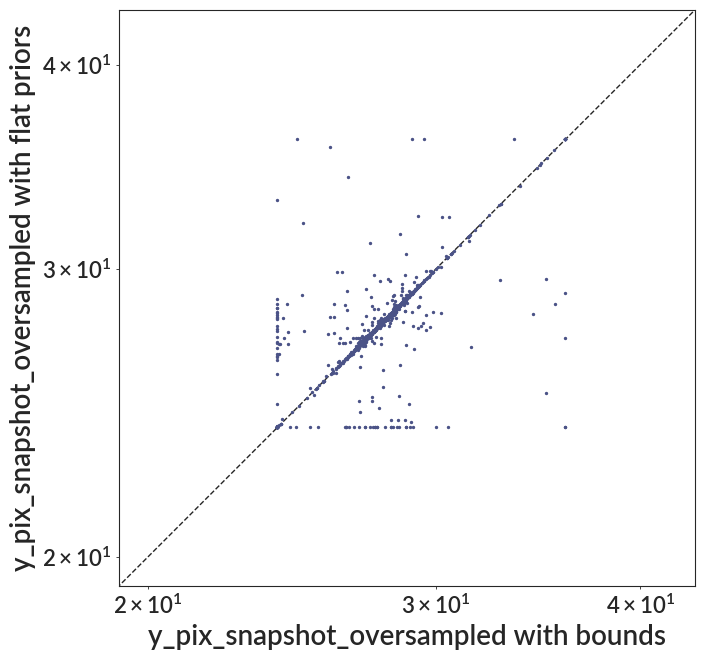

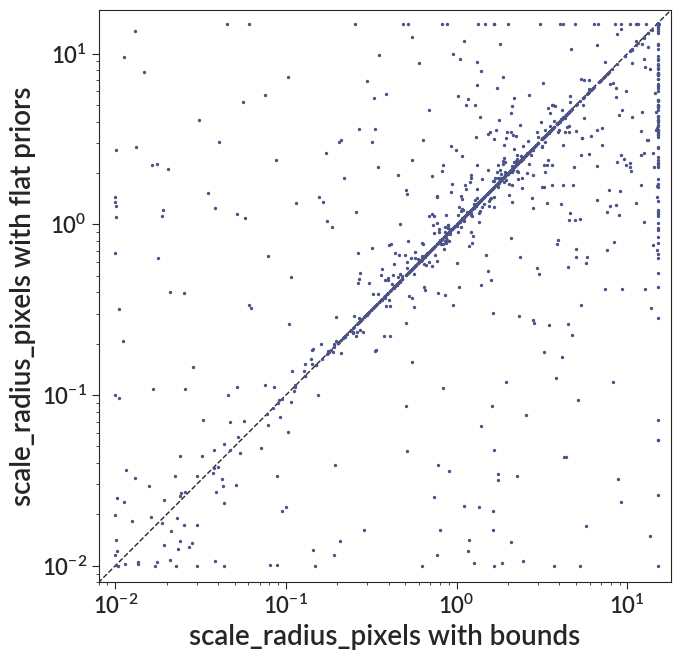

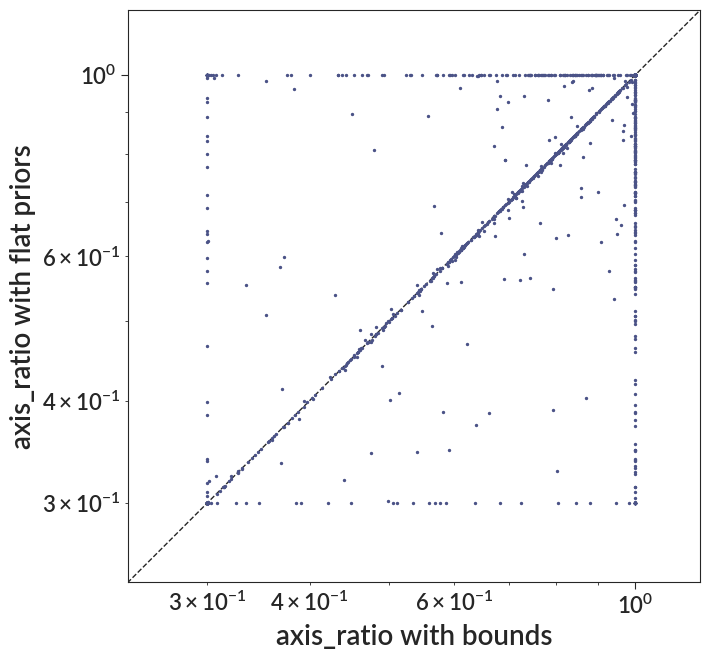

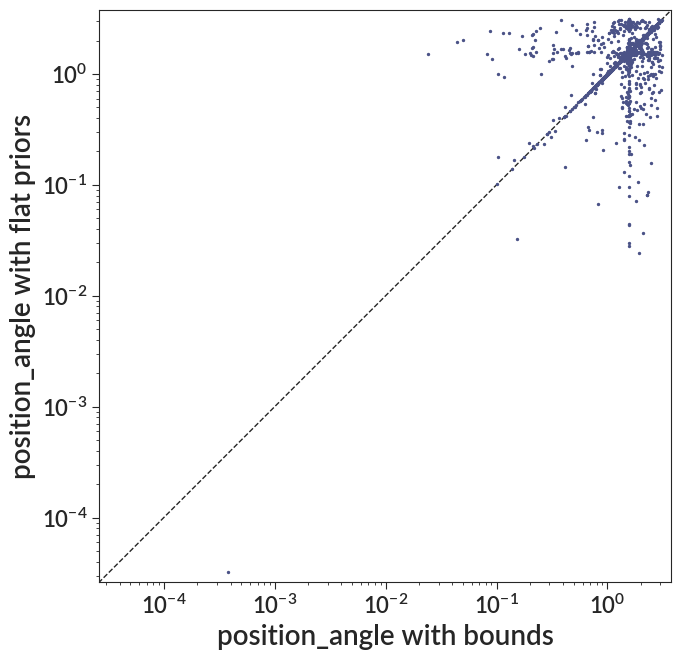

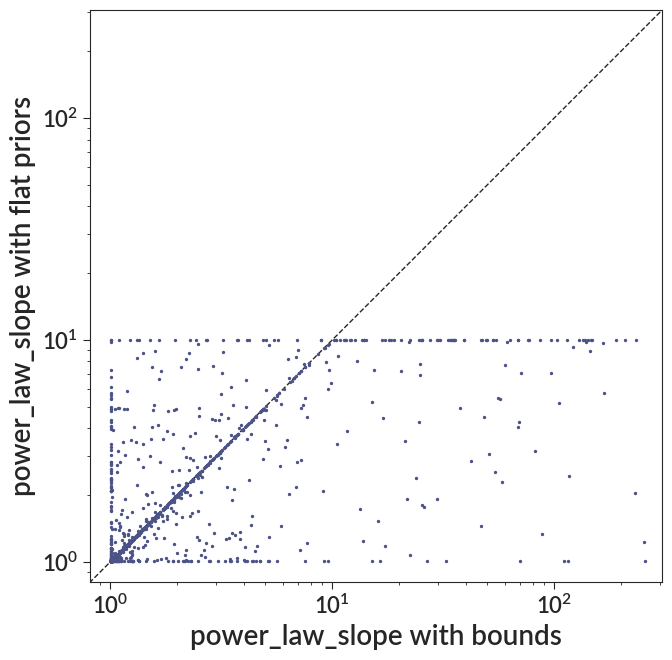

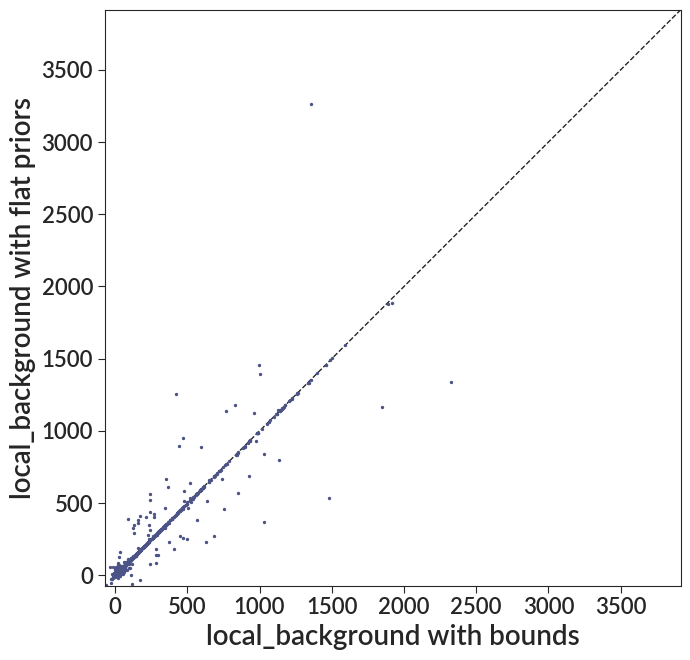

In [5]:
for colname in ["r_eff_pixels_rmax_15pix", "central_surface_brightness",
                "x_pix_snapshot_oversampled", "y_pix_snapshot_oversampled",
                "scale_radius_pixels", "axis_ratio",
                "position_angle", "power_law_slope",
                "local_background"]:
    colname_no_prior = f"{colname}_best_1"
    colname_flat_prior = f"{colname}_best_2"

    fig, ax = bpl.subplots()

    ax.scatter(
        big_catalog[colname_no_prior],
        big_catalog[colname_flat_prior],
        s=2,
        alpha=1,
        zorder=1,
    )
    
    x_min = 0.8 * np.minimum(np.min(big_catalog[colname_no_prior]),
                             np.min(big_catalog[colname_flat_prior]))
    x_max = 1.2 * np.maximum(np.max(big_catalog[colname_no_prior]),
                             np.max(big_catalog[colname_flat_prior]))

    ax.add_labels(f"{colname} with bounds", f"{colname} with flat priors")
    if x_min > 0:
        ax.set_xscale("log")
        ax.set_yscale("log")
    ax.set_limits(x_min, x_max, x_min, x_max)
    ax.plot([0, 1e10], [0, 1e10], c=bpl.almost_black, ls="--", zorder=0, lw=1)
    ax.equal_scale()
    fig.savefig(f"bounds_vs_flat_priors_{colname}.png", bbox_inches="tight")

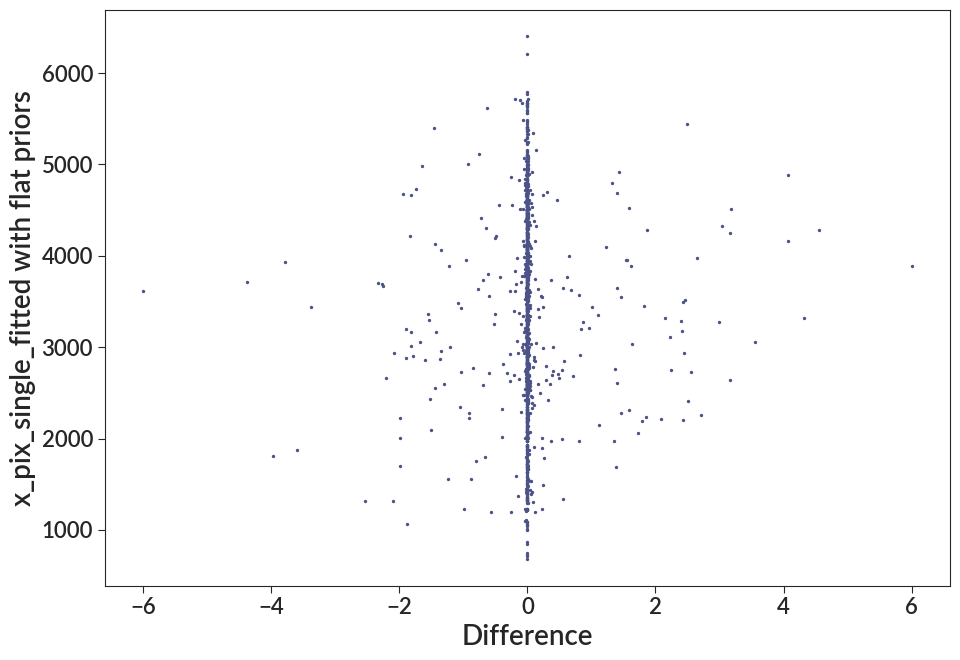

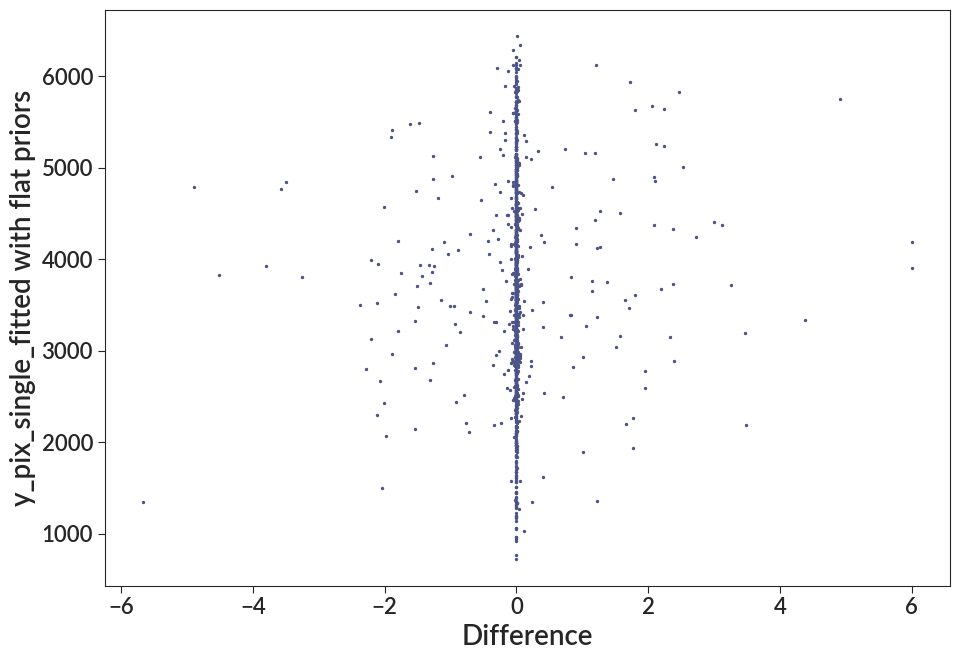

In [6]:
for colname in ["x_pix_single_fitted", "y_pix_single_fitted"]:
    colname_no_prior = f"{colname}_best_1"
    colname_flat_prior = f"{colname}_best_2"

    fig, ax = bpl.subplots()

    ax.scatter(
        big_catalog[colname_no_prior] - big_catalog[colname_flat_prior],
        big_catalog[colname_flat_prior],
        s=2,
        alpha=1,
        zorder=1,
    )
    
    x_min = 0.8 * np.minimum(np.min(big_catalog[colname_no_prior]),
                             np.min(big_catalog[colname_flat_prior]))
    x_max = 1.2 * np.maximum(np.max(big_catalog[colname_no_prior]),
                             np.max(big_catalog[colname_flat_prior]))

    ax.add_labels(f"Difference", f"{colname} with flat priors")

#     ax.set_limits(x_min, x_max, -15, 15)
#     ax.plot([0, 1e10], [0, 0], c=bpl.almost_black, ls="--", zorder=0, lw=1)
    fig.savefig(f"bounds_vs_flat_priors_{colname}.png", bbox_inches="tight")